<center>
<h1> SOLUCIÓN TAREA 1</h1>
<h3>Diego Godoy Rojas & Luis Carlos Diaz </h3>
</center>








Empezamos cargando la imagen junto con las librerias que se van utilizar:

In [ ]:
#IMPORTAR LIBRERIAS
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

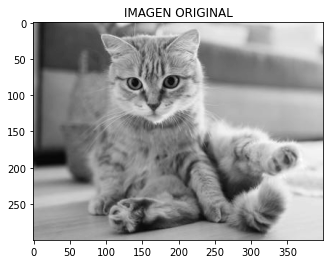

In [54]:
#CARGAR LA IMAGEN
img = cv2.imread('Fig/img1.jpg', 0)
#VISUALIZAR LA IMAGEN
plt.title("IMAGEN ORIGINAL")
plt.figure(1,figsize=[7, 7])
plt.imshow(img, cmap='gray')


**<h1>PRIMER PUNTO</h1>**
<h3>Estudiar e implementar (usar) las principales técnicas de interpolación:</h3>
        <ul>
            <li>Vecino más cercano.</li>
            <li>Bilineal.</li>
            <li>Bicubica.</li>
            <li>B-splines.</li>
       </ul></h3>

**Vecino más cercano**
 <ul>
<li>Es un método básico.</li>
<li>Solo tiene en cuenta un píxel: el más cercano al punto interpolado.</li>
<li>Simplemente aumenta el tamaño de cada píxel.</li>
       </ul>
<img src="Fig/InterV.jpg" alt="Imagen vectorial" width = "500" height="150" height="100" style="border: #034cab 4px solid;" >


**Bilineal**
<ul>
<li>Tiene en cuenta los valores en los píxeles conocidos que rodean a uno dado en una vecindad de los 2x2 píxeles más cercanos.</li>
<li>Se toma el promedio ponderado de estos 4 píxeles y se calcula el valor interpolado.</li>
<li>El resultado está más suavizado que las imágenes obtenidas utilizando el método del vecino más cercano.</li>
       </ul>
       
<img src="Fig/InterB.jpg" alt="Imagen vectorial" width = "500" height="150" style="border: #034cab 4px solid;" >


**Bicubica**
<ul><li>Un paso más allá del caso bilineal es considerar la vecindad de los 4x4 píxeles conocidos más cercanos, es decir, un total de 16 píxeles.</li>
<li>Como están situados a distancias distintas del píxel de valor desconocido, se da mayor peso en el cálculo a los más cercanos.</li>
<li>Produce imágenes más nítidas que los dos métodos anteriores.</li>
   </ul>
<img src="Fig/InterC.jpg" alt="Imagen vectorial" width = "500" height="150" style="border: #034cab 3px solid;" >


**B-splines**
<ul>
    <li>Este método de interpolación determina el color de un pixel "desconocido" basándose en el ajuste local de funciones polinómicas de determinado grado en las que las variables independientes son X e Y. El valor final del pixel va a depender de los puntos establecidos mediante la funcion que el pixel tomara como referencia</li>
    </ul>

Adicional a estos existen muchos otros metodos de interpolación que se pueden aplicar a una imagen, algunos de ellos observados sobre una imagen generada aleatoriamente son:

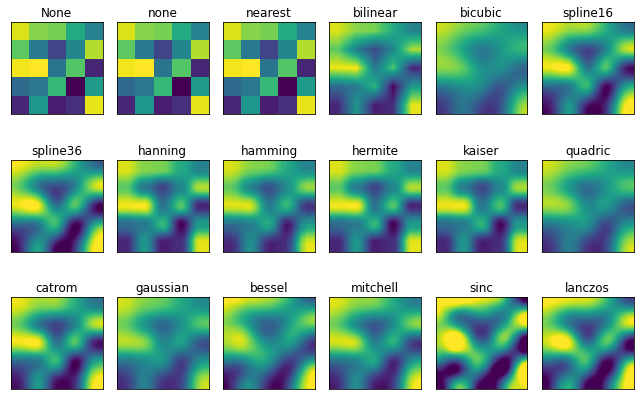

In [65]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

grid = np.random.rand(5, 5)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()

Una vez cargada la imagen, realizamos un acercamiento a la zona correspondiente a los ojos del gato, al ser una operación geométrica tambien se deben realizar diversos procesos de interpolación para comparar su desempeño entre los cuales tenemos:

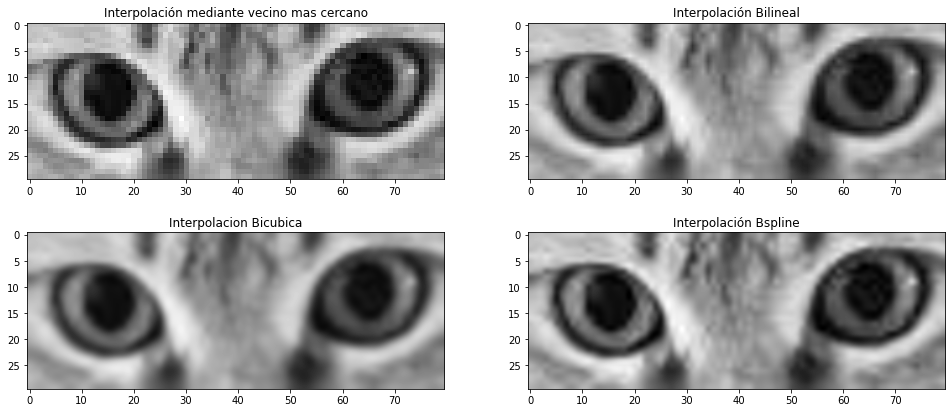

In [61]:
#PLOTEAMOS EL ACERCAMIENTO CON DIFERENTES INTERPOLACIONES

plt.figure(1,figsize=[15, 15])
plt.subplot(321), plt.imshow(img[70:100, 125:205], cmap=plt.cm.gray, interpolation='nearest')
plt.title('Interpolación mediante vecino mas cercano')
plt.subplot(322), plt.imshow(img[70:100, 125:205], cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Interpolación Bilineal')
plt.subplot(323), plt.imshow(img[70:100, 125:205], cmap=plt.cm.gray, interpolation='bicubic')
plt.title('Interpolacion Bicubica')
plt.subplot(324), plt.imshow(img[70:100, 125:205], cmap=plt.cm.gray, interpolation='spline16')
plt.title('Interpolación Bspline')
plt.subplots_adjust(top=0.95, bottom=0.4, left=0.10, right=0.95)

plt.show()

**<h1>SEGUNDO PUNTO</h1>**

Evaluar el desempeño de las técnicas de interpolación implementadas

Con la **interpolación de vecino mas cercano** la imagen obtenida esta pixelada debio a que el procedimiento consiste en agrandar cada uno de los pixeles de la imagen original, en cuanto a la **interpolación bilineal** se puede decir que se redujo el pixelado notablemente, obteniendo una imagen con mejor calidad y nitidez. La **interpolación bicubica** elimina completamente el pixelado pero compromete la nitidez de la imagen. Finalmente el metodo Bspline muestra un resultado similar a la interpolación bilineal, con la diferencia de que los contornos son mas pronunciados, el cambio de un nivel de gris al otro es mas pronunciado con lo cual se puede decir que la imagen es mas nitida.

**<h1>TERCER PUNTO</h1>**

Desarrollar una función para rotar de imágenes, cuyo parámetro de entrada sea el ángulo de rotación y cuya salida sea la imagen rotada y debidamente interpolada.

<h3>3.Desarrollar una función para rotar de imágenes, cuyo parámetro de entrada sea el ángulo de rotación y cuya salida sea la imagen rotada y debidamente interpolada.</h3>
<p>Para rotar las imagenes se usa la formula:</p>
<br>
$\left[ \begin{array}{c} x' \\ y' \end{array} \right] =
\left[ \begin{array}{cc} cos(\theta) & -sin(\theta) \\ sin(\theta) & cos(\theta) \end{array} \right]
\left[ \begin{array}{c} x \\ y \end{array} \right]$
<br>
<p>Donde a cada pixel se le asigna una nueva posición, debido a la naturaleza continua de las funciones trigonométricas usadas en la rotación algunos pixeles de la imagen de salida quedan vacios, fenomeno que se conoce como Aliasing.</p>
<table>
    <tr>
        <th style="font-size:18px; text-align:center">Imagen original</th>
        <th style="font-size:18px; text-align:center">Sin interpolación</th>
    </tr>
    <tr>
        <td><img src="Fig/imgOriginl.jpg" width = "350"></td>
        <td><img src="Fig/imgRotNone.jpg" width = "350"></td>
    </tr>
</table>
<p>Para solucionar este inconveniente es preciso interpolar los espacios vacios, para estó se implementan dos interpolaciones. En primer lugar la interpolacion de vecino cercano asigna el valor del pixel mas cercano al espacio vacio, por otro lado la interpolación bilineal toma los cuatro pixeles que están alrededor del espacio vacio y realiza un promedio.</p>
<table>
    <tr>
        <th style="font-size:18px; text-align:center">Interpolación de vecino cercano</th>
        <th style="font-size:18px; text-align:center">Interpolación bilineal</th>
    </tr>
    <tr>
        <td><img src="Fig/imgRotNear.jpg" width = "350"></td>
        <td><img src="Fig/imgRotBili.jpg" width = "350"></td>
    </tr>
</table>
<p>A primera vista no hay mucha diferencia entre ellas, pero al hacer un acercamiento se puede ver que para el caso del vecino cercano la imagen es algo pixelada y los contornos no son suaves, en cambio para la imagen con interpolación lineal se pueden ver contornos suaves y el pixelado no es tan notorio.</p>
<table width="700" border="1" text-align="center">
    <tr>
        <th style="font-size:18px; text-align:center">Sin interpolación</th>
        <th style="font-size:18px; text-align:center">Interpolación de vecino cercano</th>
        <th style="font-size:18px; text-align:center">Interpolación bilineal</th>
    </tr>
    <tr>
        <td><img src="Fig/imgRotNoneZoom.jpg" width = "250"></td>
        <td><img src="Fig/imgRotNearZoom.jpg" width = "250"></td>
        <td><img src="Fig/imgRotBiliZoom.jpg" width = "250"></td>
    </tr>
</table>

In [47]:
#FUNCION PARA REALIZAR LA INTERPOLACION DESEADA
def interpolate(image,x,y,method):
    '''
    - Vecino mas cercano = 'nearest'
    - Bilineal = 'bilinear'
    '''
    if method=="nearest":
        image[x,y]=image[x,y-1]
    if method=="bilinear":
        suma=0
        cont=0
        for a in [-1,1]:
            if 0<x+a<image.shape[0]:
                suma+=image[x+a,y]
                cont+=1
            if 0<y+a<image.shape[1]:
                suma+=image[x,y+a]
                cont+=1
        image[x,y]=suma/cont
            
#FUNCIÓN PARA ROTAR LA IMAGEN            
def rotateImage(inputImage, angle, interpolation):
    #DEFINICIÓN DE LA IMAGEN DE SALIDA
    shape=inputImage.shape
    outputImage = np.ones(shape)
    pixelCheck  = np.zeros(shape) 
    angleRad    = np.deg2rad(angle)
    #ROTACIÓN A PARTIR DE LA MATRIZ DE TRANSFORMACIÓN (ROTACIÓN)
    for i in range(shape[0]):
        for j in range(shape[1]):
            x=i-shape[0]/2
            y=j-shape[1]/2
            
            xp=np.cos(angleRad)*x-np.sin(angleRad)*y
            yp=np.sin(angleRad)*x+np.cos(angleRad)*y
            
            xp=xp+shape[0]/2
            yp=yp+shape[1]/2
            
            xp=round(xp)
            yp=round(yp)
            #MASCARA PARA REGISTRAR LOS PIXELES CORRESPONDIENTES A LA IMAGEN
            if 0<=xp<shape[0] and 0<=yp<shape[1]:
                outputImage[xp,yp]=inputImage[i,j]
                pixelCheck[xp,yp] = 1
    #SE REALIZA LA COMPROBACIÓN E INTERPOLACIÓN DE LOS PIXELES NO VALIDOS           
    for i in range(shape[0]):
        for j in range(shape[1]):
            if pixelCheck[i,j]==0:
                validation=0
                for a in [-1,1]:
                    if 0<i+a<pixelCheck.shape[0] and pixelCheck[i+a,j]==1:
                        validation=1
                    if 0<j+a<pixelCheck.shape[1] and pixelCheck[i,j+a]==1:
                        validation=1
                if validation>0:
                    interpolate(outputImage,i,j,interpolation)
    return outputImage

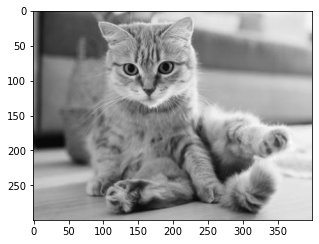

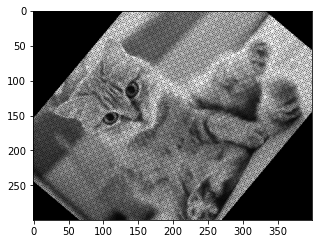

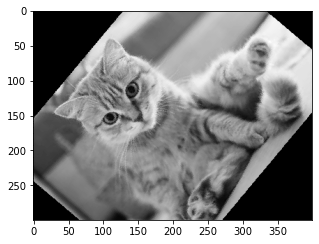

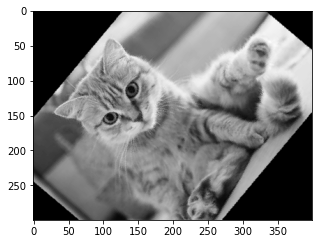

In [48]:
#DEFINIMOS EL ANGULO CON EL QUE QUEREMOS ROTAR LA IMAGEN
angulod=50

img        = cv2.imread('img1.jpg',0)
imgRotNone = rotateImage(img,angulod,"none")
imgRotNear = rotateImage(img,angulod,"nearest")
imgRotBili = rotateImage(img,angulod,"bilinear")
#GUARDAMOS LAS IMAGENES PARA USARLAS EN LA EXPLICACIÓN DE ARRIBA
cv2.imwrite("Fig/imgOriginl.jpg",img)
cv2.imwrite("Fig/imgRotNone.jpg",imgRotNone)
cv2.imwrite("Fig/imgRotNear.jpg",imgRotNear)
cv2.imwrite("Fig/imgRotBili.jpg",imgRotBili)

cv2.imwrite("Fig/imgRotNoneZoom.jpg",imgRotNone[100:150,100:150])
cv2.imwrite("Fig/imgRotNearZoom.jpg",imgRotNear[100:150,100:150])
cv2.imwrite("Fig/imgRotBiliZoom.jpg",imgRotBili[100:150,100:150])

plt.figure(1,figsize=[5, 5])
plt.imshow(img, cmap=plt.cm.gray)
plt.figure(2,figsize=[5, 5])
plt.imshow(imgRotNone, cmap=plt.cm.gray)
plt.figure(3,figsize=[5, 5])
plt.imshow(imgRotNear, cmap=plt.cm.gray)
plt.figure(4,figsize=[5, 5])
plt.imshow(imgRotBili, cmap=plt.cm.gray)

Adicional a la función ya definida diseñamos otra función con el metodo de interpolacion de vecino mas cercano, con la cual conservamos las esquinas de la imagen y adicional poder cambiar el nivel gris de los pixeles no correspondientes a la imagen original: 

In [66]:
def rotacion(imagen, angulo, color):
    '''
    |x'|=| cos Θ    -sen Θ ||x|
    |y'| | sen Θ     cos Θ ||y|
    '''
    #Definimos esta operación a continuación que nos ayudara a encontrar la ubicacion de los pixeles
    #print(imagen)
    def rot_coords(x, y, angulo):
        sen, cos = np.sin(angulo), np.cos(angulo)
        x, y = np.array(x), np.array(y)
        return x * cos - y * sen, x * sen + y * cos
    
    # Las imagenes tienen el origen en el lado izquierdo superior por lo tanto invertimos el angulo para que 
    # rote en el sentido opuesto de las manecillas ademas de convertir el angulo a radianes
    angulo = -angulo * np.pi / 180

    # Obtenemos las dimensiones de la imagen original
    img_alto, img_ancho = imagen.shape
    #print(img_alto, img_ancho)
    
    # Encontramos la posicion en donde quedarian ubicadas las esquinas de la imagen rotada
    # y las guardamos en vectores
    esquinas_x, esquinas_y = rot_coords([0, img_ancho, img_ancho, 0], [0, 0, img_alto, img_alto], angulo)
    #print(esquinas_x, esquinas_y)
    
    # Determinamos el tamaño que tendria la nueva imagen, comparando la distancia entre las esquinas halladas
    nuevo_ancho, nuevo_alto = (int(np.ceil(esquina.max() - esquina.min())) for esquina in (esquinas_x, esquinas_y)) 
    #np.ceil aproxima al entero por arriba
    #print(nuevo_ancho, nuevo_alto)
    
    # Creamos dos matrices de coordenadas para X y Y de la nueva imagen
    N_x, N_y = np.meshgrid(np.arange(nuevo_ancho), np.arange(nuevo_alto))
    #print(N_x, N_y)
    
    # Realizamos la transformacion de coordenadas
    sx, sy = rot_coords(N_x + esquinas_x.min(), N_y + esquinas_y.min(), -angulo)
    #print(sx, sy)
    # Realizamos la interpolacion de los vecinos cercanos
    sx, sy = sx.round().astype(int), sy.round().astype(int)
    #print(sx, sy)
    # Realizamos una mascara para mantenernos dentro de las medidas de la imagen.
    # (Trabajar con los pixeles positivos)
    mascara = (0 <= sx) & (sx < img_ancho) & (0 <= sy) & (sy < img_alto)
    #print(mascara)
    # Creamos la nueva imagen como una vacia y la llenamos con los pixeles de la imagen original (pixel-pixel)
    Salida = np.empty(shape=(nuevo_alto, nuevo_ancho), dtype=img.dtype)
    #print(Salida)
    # rellenamos las coordenadas de la nueva imagen con las de la imagen original y la ayuda de la mascara
    Salida[N_y[mascara], N_x[mascara]] = img[sy[mascara], sx[mascara]]
    #print(Salida)
    # Todas las coordenadas que no cumplan con la mascara les asignaremos un color arbitrario
    Salida[N_y[~mascara], N_x[~mascara]] = color
    #print(Salida)
    return Salida

Primero realizamos la prueba con una imagen rotada 50 grados y los pixeles no correspondientes a la imagen iguales a nivel de gris 0 (Negro)

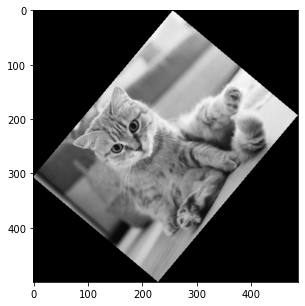

In [67]:
angulo = 50
color_relleno = 0

img_rotada=rotacion(img, angulo,color_relleno)
plt.figure(1,figsize=[5, 5])
plt.imshow(img_rotada, cmap=plt.cm.gray)

Despues realizamos la prueba con una imagen rotada 310 grados y los pixeles no correspondientes a la imagen iguales a nivel de gris 255 (Blanco)

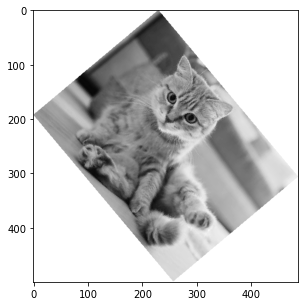

In [68]:
angulo = 310
color_relleno = 255

img_rotada=rotacion(img, angulo,color_relleno)
plt.figure(1,figsize=[5, 5])
plt.imshow(img_rotada, cmap=plt.cm.gray)